# Visualización del Modelo de Regresión Lineal y la función de error cuadrático medio

Funciones auxiliares (solo ejecutar, y seguir más abajo)

In [1]:
###############################################################################
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
###############################################################################

def visualizar_superficie_error(ax_surface,x,y,m,b,mean_error):
    ax_surface.set_xlabel("m")
    ax_surface.set_ylabel("b")
    ax_surface.set_zlabel("E")
    ax_surface.set_title("Superficie de E(m,b) ")
    ax_surface.set_zticks([])
    detail=0.01
    param_range=12
    M = np.arange(-param_range, param_range, detail)
    B = np.arange(-param_range, param_range, detail)
    Ms, Bs = np.meshgrid(M, B)
    E=np.zeros_like(Ms)
    n=len(x)
    for i in range(n):
        Yi=Ms*x[i]+Bs
        E+=(Yi-y[i])**2
    E/=n
    surf = ax_surface.plot_surface(Ms,Bs,E, cmap=cm.coolwarm,alpha=0.5,linewidth=0, antialiased=False)
    ax_surface.scatter([m],[b],[mean_error*1.1],c="green",s=70)
    plt.colorbar(surf, shrink=0.5, aspect=5)    
    
def visualizar_leyendas(ax_data,m,b,mean_error,new_x,new_y):
    model = patches.Patch(color='red', label='Modelo: y=x*{:.2f}+{:.2f}'.format(m,b))
    data = patches.Patch(color='blue', label='Datos')
    handles=[model,data]
    label='$E = \\frac{1}{n}  \sum_i^n E_i = $  %.2f' % (mean_error)
    error_patch = patches.Patch(color='black', label=label)
    handles.append(error_patch)
    if ver_nuevo_dato:
        new_patch = patches.Patch(color='green', label='Nuevo dato: x={:.2f}, y={:.2f}'.format(new_x,new_y))
        handles.append(new_patch)
        
    ax_data.legend(handles=handles,fontsize=8)
    
def visualizar_residuales(ax_data,x,y,y_predicted):
    text_pad=0.5
    for x,y,yp,i in zip(x,y,y_predicted,range(len(x))):
        ax_data.vlines(x, y,yp, colors='black')
        error=(y-yp)**2
        if abs(error)>0.1:
            if yp>y:
                text_y=y-0.7
            else:
                text_y=y+0.4
            residual_label="$E_{{ {} }}=${:.2f}".format(i,error)
            ax_data.text(x-2,text_y,residual_label,size=7)
            
def visualizar(x,y,m,b,y_predicted,errors,mean_error,new_x,new_y,ver_residuos,ver_nuevo_dato):
    # Visualizacion
    figure=plt.figure(figsize=(10,5),dpi=100)
    ax_data=figure.add_subplot(1,2,1)
    ax_surface=figure.add_subplot(1,2,2,projection='3d')
    
    #dibujar datos
    ax_data.scatter(x,y,color="blue")
    if ver_nuevo_dato:
        ax_data.scatter(new_x,new_y,color="green",s=60)
    #Etiquetas y titulos
    ax_data.set_xlabel("x (Horas estudiadas)")
    ax_data.set_ylabel("y (Nota)")
    ax_data.set_title("Horas estudiadas vs Nota")
    
    #Dibujar linea mx+b
    x_pad=0.2
    min_x,max_x=x.min(),x.max()
    min_x = min_x - abs(min_x)*0.1
    max_x = max_x + abs(max_x)*0.1
    ax_data.plot([min_x,max_x],[min_x*m+b,max_x*m+b],color="red")
    if ver_residuos:
        # Mostrar residuales (distancia entre el y verdadero y el predicho)
        visualizar_residuales(ax_data,x,y,y_predicted)
    # Mostrar leyendas
    visualizar_leyendas(ax_data,m,b,mean_error,new_x,new_y)

    
    visualizar_superficie_error(ax_surface,x,y,m,b,mean_error)
    
    plt.show()

###############################################################################



# Visualización del modelo y la superficie del error

El siguiente código carga un conjunto de datos, y luego crea un modelo de regresión lineal para predecir los valores de salida `y` en base a los de entrada `x` en base a la función `y=mx+b`.

Probá modificando los parámetros `m` y `b` del modelo, tratando de minimizar *a mano* el error. 

Observá como cambia la recta `mx+b` y qué tan bien se ajusta a los datos (izquierda) y al mismo tiempo cambia la posición de los parámetros en la función de error (bola verde/turquesa en la figura de la derecha).  

Notá que la forma de la superficie del error (un paraboloide) no cambia al modificar los parámetros (derecha). Lo que si cambia es la posición de los mismos en el espacio de todas las posibles combinaciones de `m` y `b`.


Luego de eso, entre el comentario `## COMIENZO NORMALIZAR` y `##FIN NORMALIZAR`, normalizá los datos de entrada `x` restándoles la media μ y dividiendo por la desviación estándar σ con la fórmula `x ← (x-μ)/σ`. Recordá que `x` es un vector de NumPy y por ende soporta los métodos `mean()` y `std()`. 



Responda:
* ¿Cambia la superficie de la función de error resultante al normalizar?
* ¿Cuando baja el error? ¿Puede ser 0?
* ¿Qué me dice el modelo respecto a la nota que obtienen los alumnos que no estudiaron nada? (para un b fijo)
* ¿Cuánto puedo esperar que aumente mi nota por cada hora de estudio?
* ¿Cuando es más fácil la materia? (en relación a m)



<IPython.core.display.Javascript object>


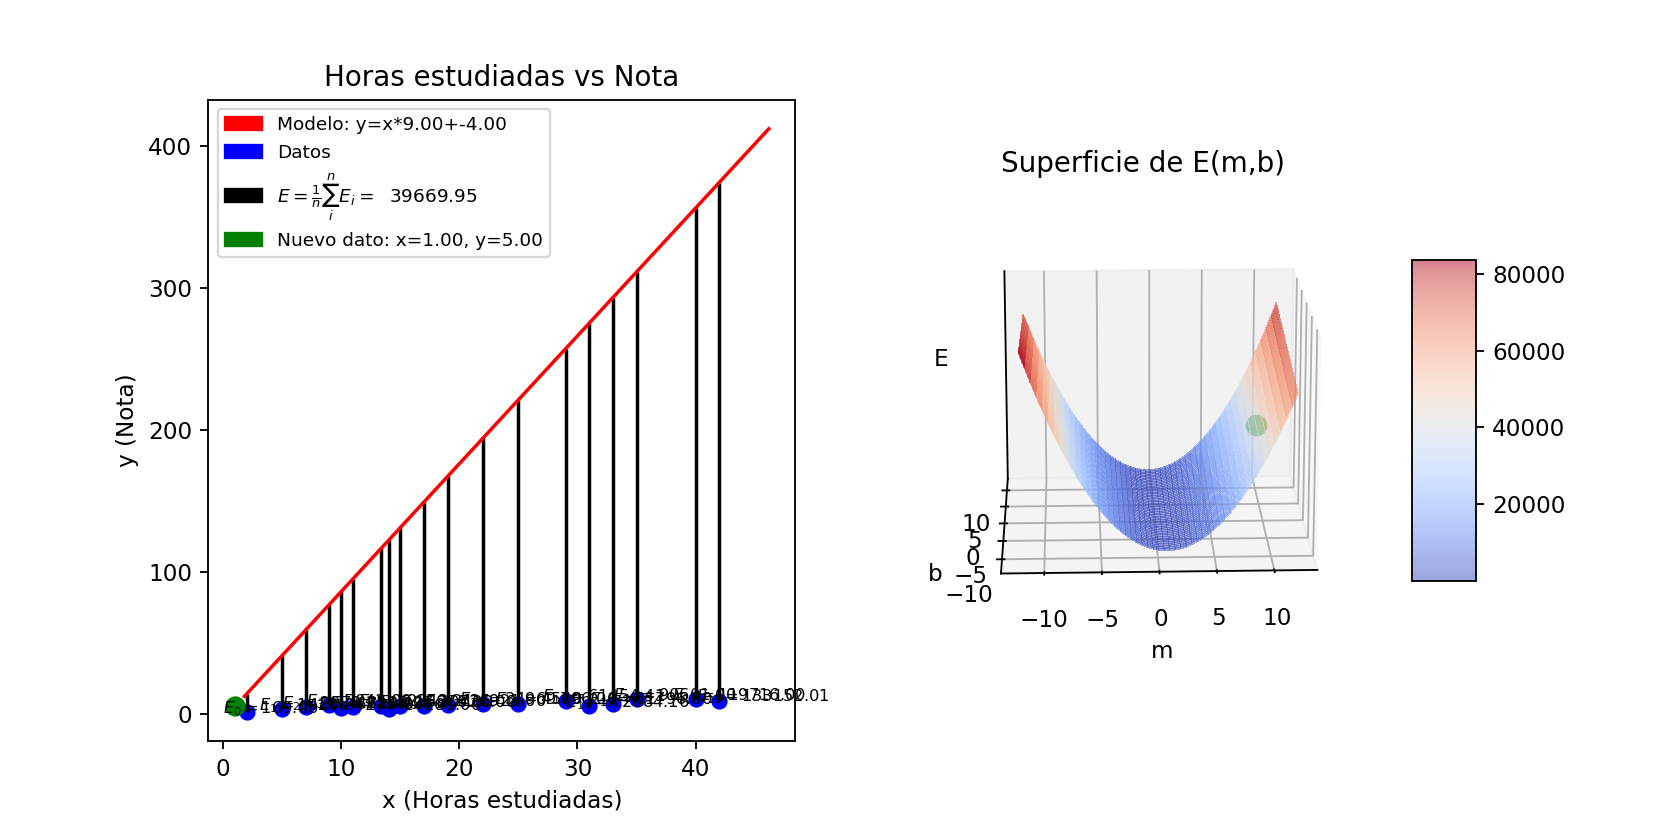

In [2]:

## Carga de datos
dataset_base=""
dataset="study_regression_small.csv"
# dataset="anscombe4.csv"
dataset_path=os.path.join(dataset_base,dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0],data[:,1]

## COMIENZO NORMALIZAR
#completar

## FIN NORMALIZAR


## Parámetros del modelo (probar valores entre -0 y 10)
m=9

b=-4

# Cálculo de la salida o predicción del modelo para todos los ejemplos
y_predicted= x*m+b

#Calculo del error del modelo
errors= (y-y_predicted)**2
mean_error=errors.mean()

# Dato nuevo a evaluar
new_x=1
new_y=new_x*m+b

#Opciones de visualización (deshabilitar para ver mejor los datos)
ver_residuos=True
ver_nuevo_dato=True
#visualizar todo

visualizar(x,y,m,b,y_predicted,errors,mean_error,new_x,new_y,ver_residuos,ver_nuevo_dato)